In [ ]:
import pandas as pd
import ast
import re

In [73]:
# Read the chordonomicon dataset
df = pd.read_csv('next_chord_decade.csv')

# Read the mapping CSV file
chord_relations = pd.read_csv('chords_mapping.csv')
# Create a dictionary with keys the "chords" and values the "degrees"
chord_degrees = dict(zip(chord_relations['Chords'], chord_relations['Degrees']))
for key, value in chord_degrees.items():
    chord_degrees[key] = ast.literal_eval(value)
chord_notes = dict(zip(chord_relations['Chords'], chord_relations['Notes']))
for key, value in chord_notes.items():
    chord_notes[key] = ast.literal_eval(value)


In [ ]:
df

In [75]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Replace 'your_dataset.csv' with the actual file or method to load your data
# df = pd.read_csv('your_dataset.csv')

# Assuming 'real_chord' and 'predicted_chord' are the columns you want to compare
real_chords = df['real_chord']
predicted_chords = df['predicted_chord']

# Calculate accuracy
accuracy = accuracy_score(real_chords, predicted_chords)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 60.13%


In [78]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Replace 'your_dataset.csv' with the actual file or method to load your data
# df = pd.read_csv('your_dataset.csv')

# Assuming 'real_chord', 'predicted_chord', and 'inp_len' are the columns you want to use
real_chords = df['real_chord']
predicted_chords = df['predicted_chord']
inp_len_values = df['inp_len']

# Define the intervals
max_inp_len = inp_len_values.max()
intervals = [(0, 25.4), (25.4, 60), (60,76.2), (76.2,101.6), (101.6, 127)]

# Calculate accuracy for each interval
for interval in intervals:
    mask = (inp_len_values >= interval[0]) & (inp_len_values < interval[1])
    accuracy = accuracy_score(real_chords[mask], predicted_chords[mask])
    print(f"Accuracy for {interval}: {accuracy * 100:.2f}%")



Accuracy for (0, 25.4): 61.23%
Accuracy for (25.4, 60): 60.89%
Accuracy for (60, 76.2): 57.40%
Accuracy for (76.2, 101.6): 55.65%
Accuracy for (101.6, 127): 53.46%


In [49]:
# remove inversions
df['real_chord'] = df['real_chord'].apply(lambda s: re.sub(r"/[^/]*$", "", s))
# remove inversions
df['predicted_chord'] = df['predicted_chord'].apply(lambda s: re.sub(r"/[^/]*$", "", s))

In [50]:
def compare_degrees(chord_1, chord_2):
    # Get the degrees of chord_1 and chord_2
    degrees_1 = chord_degrees[chord_1]
    degrees_2 = chord_degrees[chord_2]
    degrees_df = pd.DataFrame([degrees_1, degrees_2], columns=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII'])
    disjunction = degrees_df.iloc[0] & degrees_df.iloc[1]
    # Count the number of 1 in degrees_1 list
    degrees_1_count = sum(degrees_1)
    degrees_2_count = sum(degrees_2)
    # print(degrees_1_count)
    # print(degrees_2_count)
    # Count the number of 1 in disjunction
    degrees_disjunction = sum(disjunction)
    # print(degrees_disjunction)
    minimum = min(degrees_1_count,degrees_2_count)
    return degrees_disjunction/minimum

In [56]:
# Iterate through every row
c = 0
score = []
for index, row in df.iterrows():
    if index%1000 ==0:
        print(index)
    s = compare_degrees(row['real_chord'],row['predicted_chord'])
    score.append(s)
    c += s

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000


In [53]:
c/index

0.7545125529462046

In [57]:
df['score'] = score
df['score']

0        1.000000
1        0.000000
2        1.000000
3        0.666667
4        0.666667
           ...   
87585    1.000000
87586    1.000000
87587    0.333333
87588    1.000000
87589    1.000000
Name: score, Length: 87590, dtype: float64

In [77]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_dataset.csv' with the actual file or method to load your data
# df = pd.read_csv('your_dataset.csv')

# Assuming 'inp_len', 'score', and 'real_chord' are the columns you want to use
real_chords = df['real_chord']
inp_len_values = df['inp_len']
score_values = df['score']

# Define the intervals
max_inp_len = df['inp_len'].max()
# intervals = [(i, i + max_inp_len/4) for i in range(0, max_inp_len, int(max_inp_len/4))]
intervals = [(0, 25.4), (25.4, 60), (60,76.2), (76.2,101.6), (101.6, 127)]
# Calculate sum of 'score' elements and count for each interval
for interval in intervals:
    mask = (inp_len_values >= interval[0]) & (inp_len_values < interval[1])
    sum_score = score_values[mask].sum()
    count = mask.sum()
    if count != 0:
        average_score = sum_score / count
        print(f"Area {interval}: Sum of scores: {sum_score}, Count: {count}, Average Score: {average_score}")
    else:
        print(f"Area {interval}: No data points in this interval")


KeyError: 'score'

In [59]:
df

,Unnamed: 0,real_chord,predicted_chord,inp_len,score
0,0,G,G,101,1.000000
1,1,B,A,25,0.000000
2,2,B,B,21,1.000000
3,3,Fmin,F,62,0.666667
4,4,Bbmin,Gb,31,0.666667
...,...,...,...,...,...
87585,87585,G,G,70,1.000000
87586,87586,Amin,Amin,62,1.000000
87587,87587,G,D,78,0.333333
87588,87588,C,C,19,1.000000


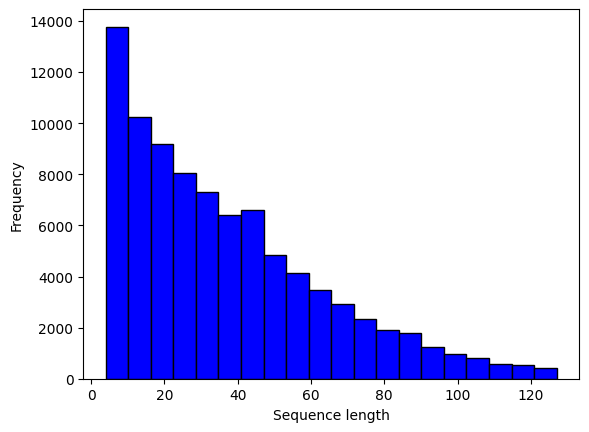

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_dataset.csv' with the actual file or method to load your data
# df = pd.read_csv('your_dataset.csv')

# Assuming 'inp_len' is the column you want to plot
plt.hist(df['inp_len'], bins=20, color='blue', edgecolor='black')

# plt.title('Distribution of inp_len')
plt.xlabel('Sequence length')
plt.ylabel('Frequency')

plt.show()

In [62]:
max_inp_len = df['inp_len'].max()
print(f"The highest value of inp_len is: {max_inp_len}")

The highest value of inp_len is: 127
